## Question  6 
### Ali Mortazavi
### 96131044


In many pattern recognition applications, Sample Generation plays an important role, where it is
necessary to generate samples which are to be normally distributed according to a given expected
vector and a covariance matrix.<bn>
In this problem, you are going to do this technique yourself. You will also practice some more
complicated matrix operations as well.

In [1]:
import random
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from numpy.linalg import inv
import seaborn as sns
from numpy import linalg 
np.set_printoptions(suppress=True)

#### a) Generate samples from three normal distributions specified by the following parameters: <br>
$n=1, N=500, \mu=500 \sigma=1,2,3$ <br>
Plot the samples, as well as the histograms associated with each of the distributions.
Compare the results.

HISTOGRAM and Data Points
mu 500 Sigma 1


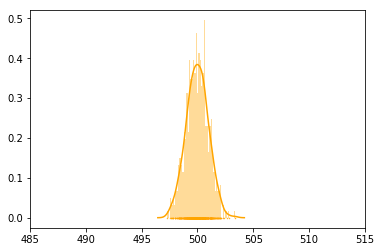

mu 500 Sigma 2


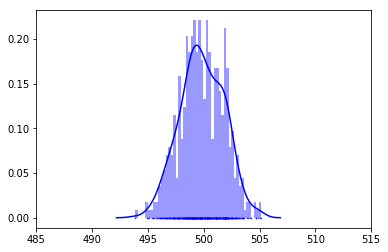

mu 500 Sigma 3


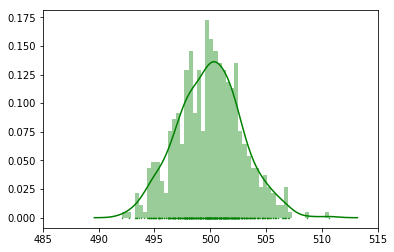

In [2]:
mu = 500
sigmas = [1,2,3]
colors = ["orange", "blue", "green"]
N = 500
bins = 50
print ("HISTOGRAM and Data Points")
for i in range(0, len(sigmas)):
    s = np.random.normal(mu, sigmas[i], N)
    print ("mu", mu, "Sigma", sigmas[i])
    sns.distplot(s, color=colors[i], bins=bins)
    plt.scatter (s, np.zeros(len(s)), s=0.2,  color=colors[i])
    plt.xlim([485, 515])
    plt.show()
# 
# for i in range(0, len(sigmas)):
#     s = np.random.normal(mu, sigmas[i], N)
#     print ("mu", mu, "Sigma", sigmas[i])
#     plt.scatter (s, np.zeros(len(s)), s=0.1, color=colors[i])
#     plt.xlim([485, 515])
#     plt.show()

#### b) Generate samples from a normal distributions specified by the following parameters: <br>
$ n = 2, N = 500, M = \begin{bmatrix}
       2   \\
       1 
     \end{bmatrix}, \Sigma = \begin{bmatrix}
       2  & 1 \\
       1  & 3
     \end{bmatrix}$ <br>
Display the samples, as well as the associated contour plot.

$
\begin{pmatrix}
2 & 3 & 1 \
0.5 & 2 & -1 \
-1 & 5 & -7
\end{pmatrix}
$

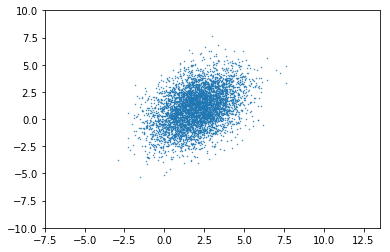

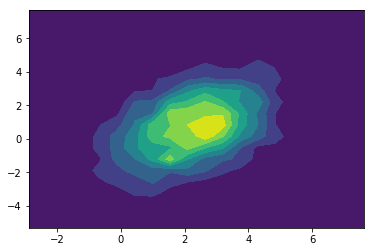

In [3]:
N =5000 # we changed N, because N=500 was too small for being visualized well
samples = np.random.multivariate_normal(np.array([2,1]), np.array([[2,1],[1,3]]), N)
plt.xlim([-7.5, 13.5])
plt.ylim([-10, 10])
plt.scatter (samples[:,0], samples[:,1], s=0.2)
plt.show()
bins= 20

(counts, x_bins, y_bins) = np.histogram2d(samples[:, 0], samples[:, 1], bins=bins)
plt.contourf(counts, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]])
plt.show()
samples_for_f = samples


#### c. Consider a normal distribution specified by the following parameters: 
$ n = 2, N = 500, M = \begin{bmatrix}
       m_1   \\
       m_2 
     \end{bmatrix}, \Sigma = \begin{bmatrix}
       \sigma_{11}  & \sigma_{12} \\
       \sigma_{21}  & \sigma_{22}
     \end{bmatrix}$ <br>
Determine appropriate values for each of the unknown variables, so that the shape of the
distribution becomes: <br> 
> c.1) A circle in the upper left of the Euclidean coordinate system. <br>
> c.2) A diagonal line (/ shape) in the centre<br>
> c.3) A horizontal ellipsoid in the lower right of the Euclidean coordinate system<br>


Display the generated samples. <br>

    c.1) A circle in the upper left of the Euclidean coordinate system: 
$$ m_1 < 0 , m_2 > 0, \Sigma = I $$

In [4]:
def setting_function ():
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

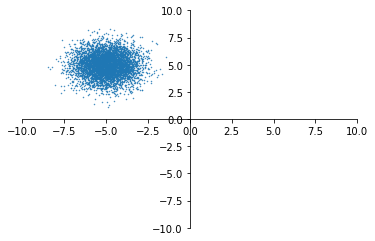

In [5]:
N =5000 # we changed N, because N=500 was too small for being visualized well
samples = np.random.multivariate_normal(np.array([-5,5]), np.array([[1,0],[0,1]]), N)
setting_function()


plt.scatter (samples[:,0], samples[:,1], s=0.2)
plt.show()




    c.2) A diagonal line (/ shape) in the centre<br>
We have to select M to be $(0,0)$ for being in the center. <br>
to make the distribution like a line /, we will choose $Sigma$ so that its biggest eigenvector of $\Sigma$ points to the / direction (parallel to $vector=(1,1))$ and its second eigen vector points to $(-1, 1)$. <br>
To make the distribution similar to a diogional line, we will choose $\lambda_1=10, \lambda_2=1 $


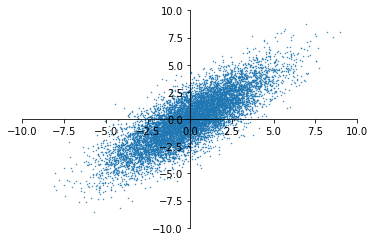

In [6]:
N=10000
setting_function()
samples = np.random.multivariate_normal(np.array([0,0]), np.array([[11/2,9/2],[9/2,11/2]]), N)
plt.scatter (samples[:,0], samples[:,1], s=0.2)
plt.show()

     c.3) A horizontal ellipsoid in the lower right of the Euclidean coordinate system
     

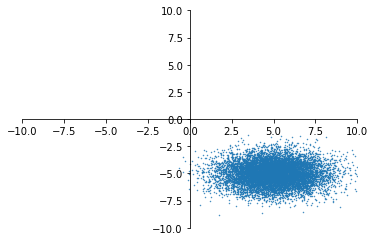

In [7]:
N=10000
setting_function()
samples = np.random.multivariate_normal(np.array([5,-5]), np.array([[2.5, 0],[0,1]]), N)
plt.scatter (samples[:,0], samples[:,1], s=0.2)
plt.show()

#### d) Consider a random variable with 
$ n = 2, N = 500, M = \begin{bmatrix}
       2   \\
       3
     \end{bmatrix}, \Sigma = \begin{bmatrix}
       1  & 2\rho \\
      2 \rho  & 4
     \end{bmatrix}$ <br>
#### compute $d^2(x)$ analytically, if the parameters are: 
$$ \rho = \{-0.99, -0.5, 0.5, 0.99\} $$

If $ \Sigma^{-1} = \begin{bmatrix}
       a  & b \\
      c   & d
     \end{bmatrix}$ <br> then:
$ d^2(x)= (x-m)^T \Sigma^{-1} (x-m) = ax_1^2 + (-4a -3(c+d))x_1 + (-6d -2(c+d))x_2 + (c+d)x_1x_2 + dx_2^2 $ <br>
for $\rho =-0.99$:
$$ d^2(x)= 50x_1^2 + (-350)x_1 + (-75)x_2 + 50 x_1x_2 + 12.5x_2^2 $$

Sigma is
[[ 1.   -1.98]
 [-1.98  4.  ]]
Formula
50.25125628140685x^2 + -313.31658291457177x +-150.25125628140648y + 37.43718592964811xy + 12.562814070351713y^2 = 0


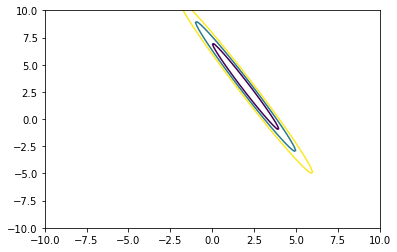

Sigma is
[[ 1. -1.]
 [-1.  4.]]
Formula
1.3333333333333333x^2 + -7.333333333333333x +-3.333333333333333y + 0.6666666666666666xy + 0.3333333333333333y^2 = 0


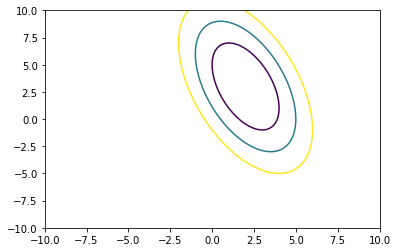

Sigma is
[[1. 1.]
 [1. 4.]]
Formula
1.3333333333333333x^2 + -5.333333333333333x +-2.0y + 0.0xy + 0.3333333333333333y^2 = 0


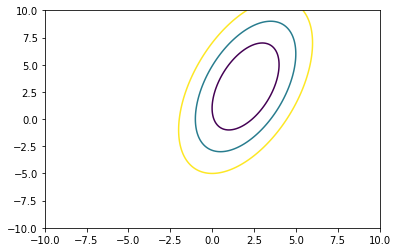

Sigma is
[[1.   1.98]
 [1.98 4.  ]]
Formula
50.25125628140685x^2 + -164.07035175879338x +-50.75376884422092y + -12.311557788944679xy + 12.562814070351713y^2 = 0


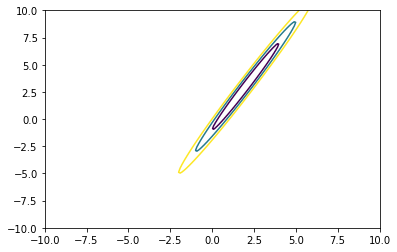

In [8]:
levels=[4,9,16]
plt.xlim(-10,10)
plt.ylim(-10,10)
X,Y = np.mgrid[-10:10.1:0.1, -10:10.1:0.1]
xy = np.vstack((X.flatten(), Y.flatten())).T
Sigmas = []
vals = [-0.99, -0.5, 0.5, 0.99]
for val in vals:
    Sigmas.append(np.array([[1,2*val],[2*val,4]]))
mu = np.array([2,3]) #np.array([0,0])# np.array([2,3])
def d_squared (xy, sigma, mu):
    matrix = inv(sigma)
    a = xy - mu
    t = np.matmul(a,matrix)
    return np.matmul(t, a.T)
for sigma in Sigmas:
    
    print ("Sigma is")
    print (sigma)
    print ("Formula")
    t= inv(sigma)
    a = t[0][0]
    b = t[0][1]
    c = t[1][0]
    d = t[1][1]
    s =  str(a) + "x^2 + " +  str(-4*a-3*(c+d)) +  "x +" + str(-6*d-2*(c+d)) + "y + " + str(c+d) + "xy + " + str(d) +  "y^2 = 0"  
    print (s)
    Z = np.apply_along_axis(func1d = d_squared, axis= 1, arr = xy, sigma=sigma, mu = mu)
    Z = np.reshape(Z, (len(X), -1))
    plt.contour(X,Y,Z, levels=[4,9,16])
    plt.show()


#### f) Calculate the sample mean $ \hat{M} $, and sample covariance matrix $\hat{\Sigma}$ of the distribution in part b., and comment on the results.

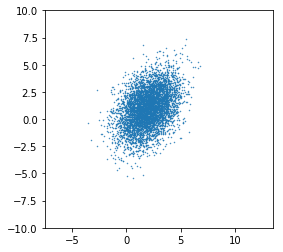

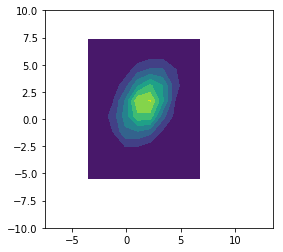

In [9]:
#Just repeating part b:

N =5000
samples = np.random.multivariate_normal(np.array([2,1]), np.array([[2,1],[1,3]]), N)
plt.xlim([-7.5, 13.5])
plt.ylim([-10, 10])
plt.gca().set_aspect('equal')
plt.scatter (samples[:,0], samples[:,1], s=0.2)
plt.show()
bins= 10

plt.xlim([-7.5, 13.5])
plt.ylim([-10, 10])
plt.gca().set_aspect('equal')
(counts, x_bins, y_bins) = np.histogram2d(samples[:, 0], samples[:, 1], bins=bins)
plt.contourf(counts, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]])
plt.show()

In [10]:
estimated_mean = np.mean(samples, axis=0)
print ("estimated mean", estimated_mean)
print ("real mean [2,1]")
estimated_var = 0
for i in range(0, len(samples)):
    vec = np.array([samples[i]-estimated_mean])
    tmp = np.matmul(vec.T, vec)
    estimated_var += tmp
estimated_var /= (len(samples)-1)
print ("estimated sigma")
print (estimated_var)
print ("real sigma:")
print (np.array([[2,1],[1,3]]) )

estimated mean [1.97942737 1.03041668]
real mean [2,1]
estimated sigma
[[1.97170239 0.94409548]
 [0.94409548 2.94438547]]
real sigma:
[[2 1]
 [1 3]]


Comment: The estimated mean and sigma are close to real mean and real sigma. <br>
Since these estimations are consistent and not biased, the estimation will become close to the real value as the number of samples become large enough.

#### g) Simultaneously diagonalise $\sigma$ and $\hat{\sigma}$ , and form a vector $ V = [\lambda_1, \lambda_2]^T $


first transformation
[[-0.72261438 -0.27747967]
 [ 0.44061137 -0.45507404]]
checking whether does it transform sigma to I
[[ 1.  0.]
 [-0.  1.]]
[[-0.85379993 -0.52060127]
 [ 0.52060127 -0.85379993]]


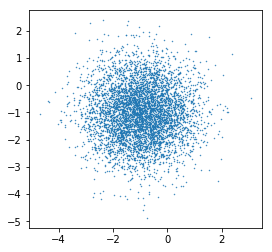

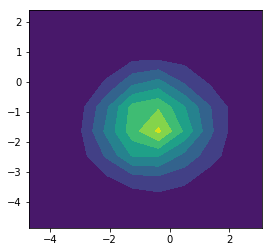

In [11]:

real_sigma = np.array([[2,1],[1,3]])
# First, whiten the estimated sigma:
estimated_sigma = estimated_var
w, v = linalg.eig(estimated_sigma)
normalizer = np.diag(np.sqrt(1/w))
first_transformation = np.matmul(v, normalizer)
print ("first transformation")
print (first_transformation)
print ("checking whether does it transform sigma to I")
estimated_sigma_2 = np.matmul(first_transformation.T,( np.matmul(estimated_sigma, first_transformation)))
print (estimated_sigma_2)
print (v)
first_transformation = first_transformation.T
# Test on sampled data

whiten_samples = []
for i in range(0, len(samples)):
    whiten_samples.append(np.matmul(first_transformation, samples[i]))
whiten_samples = np.asarray(whiten_samples)



# plt.xlim([-6,4])
# plt.ylim([-5,5])
plt.gca().set_aspect('equal')
plt.scatter (whiten_samples[:,0], whiten_samples[:,1], s=0.2)
plt.show()
bins= 10
# plt.xlim([-6,4])
# plt.ylim([-5,5])
plt.gca().set_aspect('equal')
(counts, x_bins, y_bins) = np.histogram2d(whiten_samples[:, 0], whiten_samples[:, 1], bins=bins)
plt.contourf(counts, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]])
plt.show()

In [12]:
#now for the real sigma
# calculate real sigma after first transformation
real_sigma_2 = np.matmul(first_transformation, np.matmul(real_sigma, first_transformation.T))
w,v = linalg.eig(real_sigma_2)
second_transformation = v.T
#checking whether this transformation works properly or not
real_sigma_3 = np.matmul(second_transformation, np.matmul(real_sigma_2, second_transformation.T))
print ("real sigma after transformation")
print (real_sigma_3)
# Now check that this transformation makes no change in the estimaed sigma:
print ("estimated sigma after transformation")
estimated_sigma_3 = np.matmul(second_transformation, np.matmul(estimated_sigma_2, second_transformation.T))
print (estimated_sigma_3)



real sigma after transformation
[[ 0.98902369 -0.        ]
 [-0.          1.02876499]]
estimated sigma after transformation
[[ 1. -0.]
 [-0.  1.]]


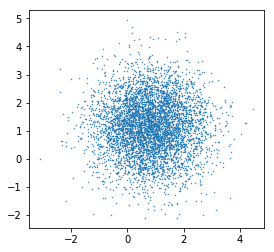

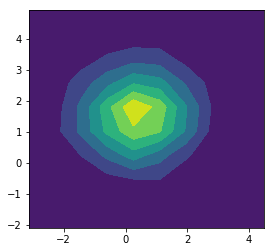

In [13]:
#So we have to apply this new transformation to the sample data
import sys
transformed_whiten = []
for i in range(0, len(whiten_samples)):
    transformed_whiten.append(np.matmul(second_transformation, whiten_samples[i]))
transformed_whiten = np.asarray(transformed_whiten)

plt.gca().set_aspect('equal')
plt.scatter (transformed_whiten[:,0], transformed_whiten[:,1], s=0.2)
plt.show()
bins= 10
# plt.xlim([-6,4])
# plt.ylim([-5,5])
plt.gca().set_aspect('equal')
(counts, x_bins, y_bins) = np.histogram2d(transformed_whiten[:, 0], transformed_whiten[:, 1], bins=bins)
plt.contourf(counts, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]])
plt.show()

V = [1.02404447         1.0067168 ]

#### h) Find a transformation for covariance matrix of the distribution in part b., such that when applied on the data, the covariance matrix of the transformed data becomes I . Transform the data and display the distribution in the new space.

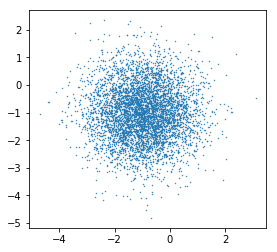

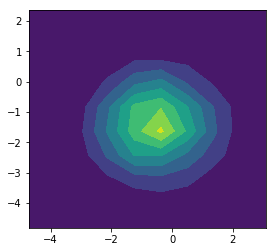

In [14]:
w,v = linalg.eig(real_sigma)
normalizer = np.diag(np.sqrt(1/w))
transformation = (np.matmul(v, normalizer)).T
transformed_version = []
for i in range(0, len(samples)):
    transformed_version.append(np.matmul(transformation, samples[i]))
transformed_version = np.asarray(transformed_version)
plt.gca().set_aspect('equal')
plt.scatter (transformed_version[:,0], transformed_version[:,1], s=0.2)
plt.show()
bins= 10
# plt.xlim([-6,4])
# plt.ylim([-5,5])
plt.gca().set_aspect('equal')
(counts, x_bins, y_bins) = np.histogram2d(transformed_version[:, 0], transformed_version[:, 1], bins=bins)
plt.contourf(counts, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]])
plt.show()

#### i) Calculate the eigenvalues and eigenvectors associated with the covariance matrix of the distribution in part b. Plot the eigenvectors. What can you infer from them?


$$ det (\begin{bmatrix}
       2-\lambda  & 1 \\
      1   & 3 - \lambda
     \end{bmatrix}) = 0 \rightarrow \lambda^2 - 5\lambda + 5 =0 \rightarrow \lambda_1 = 1.38, \lambda_2= 3.62 $$
     $$ v_1= (-0.85, 0.52) , v_2 = (-0.52, -0.85) $$

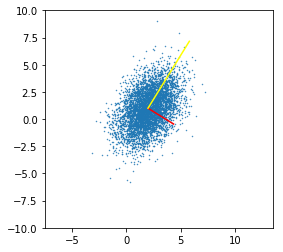

In [15]:
w,v = linalg.eig(real_sigma)
N =5000
samples = np.random.multivariate_normal(np.array([2,1]), np.array([[2,1],[1,3]]), N)
plt.xlim([-7.5, 13.5])
plt.ylim([-10, 10])
plt.gca().set_aspect('equal')
plt.scatter (samples[:,0], samples[:,1], s=0.2)
magnitude = -2
plt.plot([2,2 + magnitude * w[0] * v[0][0]], [1, 1+magnitude * w[0] * v[1][0]], color="red")
plt.plot([2,2 +magnitude * w[1] * v[0][1]], [1, 1+magnitude * w[1] *v[1][1]], color="yellow")
plt.show()
bins= 10

As you can see, the eigen vectors are in the direction of ellipsoid axises. The one with the bigger eigen value is in the direction of semi major axis. 

#### j) Again, consider the distribution and samples you generated in part b. Construct a 2*2 matrix P , which has eigenvectors associated with $\Sigma$ as its columns. Project your generated samples to a new space using $Y_i = (X_i -M)*P $, and plot the samples. What differences do you notice?

[0.58240124 0.02261377]


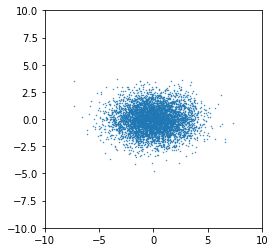

In [16]:
P = np.array([[v[0][1], v[0][0]],[v[1][1], v[1][0]]])
new_samples = []
mean = np.array([2,1])
print (np.matmul((samples[0]-mean), P))
for i in range(0, len(samples)):
    new_samples.append(np.matmul((samples[i]-mean), P))
new_samples = np.asarray(new_samples)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.gca().set_aspect('equal')
plt.scatter (new_samples[:,0], new_samples[:,1], s=0.2)
plt.show()

The difference between this transformation and the previous one is that this transformation is in the **right side** of the vector while the prevoius one was in the **left side**.<br>
So we can use **eigenvector matrix** in the as right side transform or **transposed of (eigenvector matrix)** in the left side. 

#### k) Find the covariance matrix associated with the projected samples in part h. Also calculate its eigenvalues and eigenvectors, and comment on the results.

In [17]:
estimated_mean = np.mean(transformed_version, axis=0)
print ("estimated mean \n", estimated_mean)
estimated_var = 0
for i in range(0, len(transformed_version)):
    vec = np.array([transformed_version[i]-estimated_mean])
    tmp = np.matmul(vec.T, vec)
    estimated_var += tmp
estimated_var /= (len(samples)-1)
print ("estimated sigma")
print (estimated_var)

estimated mean 
 [-0.97151075 -1.00791662]
estimated sigma
[[ 1.01024244 -0.00571752]
 [-0.00571752  0.97289499]]


In [18]:
w,v =linalg.eig(estimated_var)
print (w)
print (v)

[1.01109813 0.9720393 ]
[[ 0.98898548  0.14801256]
 [-0.14801256  0.98898548]]


Since this covariance matrix is actually identity matrix, its eigenvalues is 1 and its eigenvectors is (1,0) and (0,1)